In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
df = pd.read_csv("Surgical-deepnet.csv")
df.tail()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1
14634,14.40,6.1,1,0,1,0,0,0,1,0,...,0.78,2,0,7.65,4,1,0,1.06,0,1


In [3]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [4]:
X = df.drop('complication' ,axis=1).copy().values
Y = df['complication'].copy().values
# split the data into training and test sets

X_train ,X_test ,  Y_train , Y_test = train_test_split(X,Y ,shuffle=True, test_size=0.2)


X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [5]:
# number of features (x)== number of W's
# Activation Function Added
 
class Perceptron :
    def __init__(self , learning_rate , input_length):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)


    def fit(self , X_train , Y_train , epochs):
        
        for epoch in tqdm(range(epochs)) :
            #for i in range(len(X_train)):
                #x = X_train[i]
                #y = Y_trin[i]
            for x , y in zip(X_train , Y_train ): # in halghe for hamzaman rooye do ta list jelo mire // chasboondane 2 ta araye 
                y_pred = x @ self.weights + self.bias

                # give y_pred to ACTIVATION FUNCTION 
                # chon output ya 0 as ya 1 , pas az sigmoid estefade mikonim
                y_pred = self.activation(y_pred , "sigmoid")
                # forwarding finished

                #hengame train = ham be forwarding + va ham backprop nyaz darim 
                #vaghti train tamoom mishe , va mikhaim az model estefade konim , yani dar taabe predict , faghat forwarding ro darim , va backprop nadarim


                # START BACKPROPAGATION 
                # 1- CALC ERROR
                # تا خطا نداشته باشیم آپدیتی هم نداریم
                error = y - y_pred
                # 2- updating weights and bias 
                # bayad az wx+b=y moshtagh begirim ta be min w beresim : pas moshagheh nesbat be w mishse : x + 1

                # in rabete x dare chon moshatgheh w = x hast 
                self.weights = self.weights + (self.learning_rate * error * x)
                # in rabete x nadare chon : moshtaghe wx+b=y  ==> x+1 mishe , ke 1 moshtaghe b hast nesbat be w
                self.bias = self.bias + ( self.learning_rate * error)


                
    def activation(self, x , function):
        if function == "sigmoid" :
            return 1 / (1 + np.exp(-x)) 
        
        elif function == "relu" :
            return np.maximum(0 , x)
        
        elif function == "tanh" :
            return np.tanh(x)
        
        elif function == "linear" :
            return x 
        
        else :
            raise Exception("unknown activation function")



    def predict(self , X_test):
        Y_pred = []
        for x_test in X_test :
            y_pred = x_test @ self.weights + self.bias 
            y_pred = self.activation(y_pred , "sigmoid")
            Y_pred.append(y_pred)

        return np.array(Y_pred)


    def calculate_loss(self, X_test , Y_test , metric):
        Y_pred = self.predict(X_test)
        if metric == "mse" :
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae" :
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square( Y_test - Y_pred)))
        else :
            raise Exception("unknown metric")
        


    def calculate_accuracy(self , X_test , Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = np.where(Y_pred > 0.5  , 1 ,  0)      
        accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
        return accuracy


    def evaluate(self , X_test , Y_test):

        loss = self.calculate_loss(X_test , Y_test , "mse")
        accuracy = self.calculate_accuracy(X_test , Y_test)
        
        return loss , accuracy

    


model = Perceptron(learning_rate= 0.001 , input_length= X_train.shape[1])
model.fit(X_train , Y_train , epochs=256)

# x * w + b  = y

# backpropagation = update w's and bias 
# error  = y - ypred

# methods : adam - rmsprob - SGD
# SGD = w = w + ( error * x * lr )
#    bias = b + ( error * lr )

100%|██████████| 256/256 [01:34<00:00,  2.70it/s]


In [6]:
model.evaluate(X_test ,Y_test)

(0.2621623704268538, 0.7922787837376153)

In [7]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1)
Y_pred = np.where(Y_pred > 0.5 , 1 , 0)

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_pred)

[Text(0, 0.5, 'Healthy'), Text(0, 1.5, 'sick')]

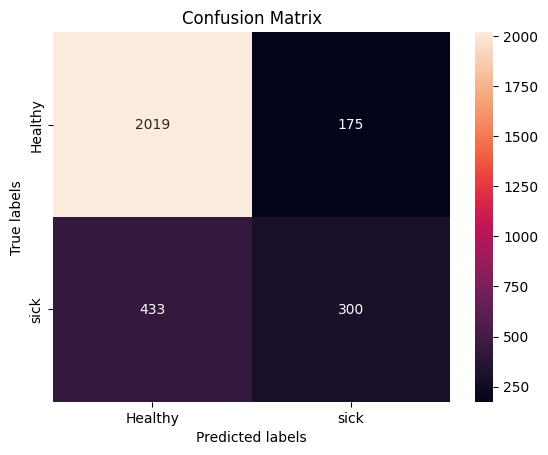

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = plt.subplot()
sns.heatmap(cm , annot=True , fmt='g' , ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Healthy' ,'sick'])
ax.yaxis.set_ticklabels(['Healthy' ,'sick'])

In [10]:
# precision and recall
from sklearn.metrics import precision_score,recall_score

print('precosion_score:',precision_score(Y_test,Y_pred))
print('recall_score:',recall_score(Y_test,Y_pred))

precosion_score: 0.631578947368421
recall_score: 0.4092769440654843
